# Самостоятельное задание.

### Создать ноутбук, в котором выполнить решение вычислительной задачи (например, задачи из области физики, экономики, математики, статистики и т. д.) требующей построения трехмерного графика, условие которой предварительно необходимо согласовать с преподавателем.

#### Условие:
Предположим, что вы являетесь менеджером инвестиционного фонда и вам предстоит принять решение о распределении портфеля между двумя активами: акциями и облигациями. Вам известно, что ожидаемая доходность (Expected Return) и стандартное отклонение (Standard Deviation) для каждого актива следующее:

Акции:
Ожидаемая доходность: 0.12
Стандартное отклонение: 0.15

Облигации:
Ожидаемая доходность: 0.06
Стандартное отклонение: 0.08

Вам необходимо найти такое сочетание акций и облигаций, при котором риск (измеряемый стандартным отклонением портфеля) минимален при заданном уровне ожидаемой доходности.

Для решения этой задачи можно использовать концепцию эффективного фронта (Efficient Frontier) из модернизированной теории портфеля (Modern Portfolio Theory). Эффективный фронт представляет собой границу, на которой находятся оптимальные портфели с разными сочетаниями активов.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

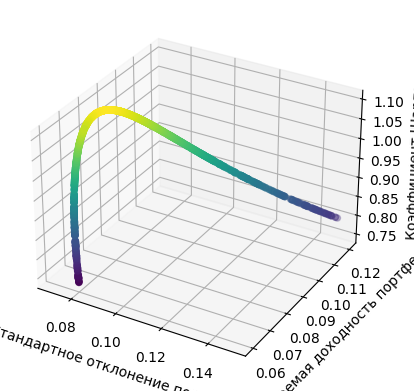

Оптимальный портфель:
Акции: 0.33351393104883925
Облигации: 0.6664860689511607


In [11]:
expected_return = np.array([0.12, 0.06])
std_deviation = np.array([0.15, 0.08])

weights = np.random.random((1000, 2))
weights = weights / np.sum(weights, axis=1)[:, np.newaxis]

# Вычисление ожидаемой доходности и стандартное отклонение портфеля для каждого набора весов
portfolio_return = np.dot(weights, expected_return)
portfolio_std_dev = np.sqrt(np.dot(weights**2, std_deviation**2))

# Построение трехмерного графика эффективного фронта
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(portfolio_std_dev, portfolio_return, portfolio_return / portfolio_std_dev, c=portfolio_return / portfolio_std_dev, marker='o')

ax.set_xlabel('Стандартное отклонение портфеля')
ax.set_ylabel('Ожидаемая доходность портфеля')
ax.set_zlabel('Коэффициент Шарпа')

plt.show()

# Находим портфель с минимальным риском при заданной ожидаемой доходности
target_return = 0.08
target_weights = weights[portfolio_return >= target_return]
min_std_dev = np.min(portfolio_std_dev[portfolio_return >= target_return])
optimal_portfolio = target_weights[portfolio_std_dev[portfolio_return >= target_return] == min_std_dev]

print('Оптимальный портфель:')
print('Акции:', optimal_portfolio[0][0])
print('Облигации:', optimal_portfolio[0][1])

График представляет собой трехмерную визуализацию эффективного фронта - границы оптимальных портфелей с разными сочетаниями активов (акции и облигации) на основе ожидаемой доходности и стандартного отклонения портфеля.